In [5]:
pip install python-dotenv  

Note: you may need to restart the kernel to use updated packages.


In [3]:
import os
from langchain.agents import AgentExecutor, create_openai_tools_agent
from langchain_openai.chat_models.azure import AzureChatOpenAI
from langchain.tools import tool
from langchain.prompts import ChatPromptTemplate, MessagesPlaceholder
import json
from langgraph.checkpoint.sqlite import SqliteSaver
from langgraph.graph import END, MessageGraph
from langgraph.prebuilt.tool_node import ToolNode
import json
from typing import Annotated, Literal
from typing_extensions import TypedDict
from langchain_core.messages import ToolMessage
from langgraph.graph import StateGraph, MessageGraph
from langgraph.graph.message import add_messages
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.pydantic_v1 import BaseModel, Field
from langchain_openai import ChatOpenAI
from langchain.chains import LLMChain
from pydantic import ValidationError


import os
from openai import AzureOpenAI
from azure.identity import DefaultAzureCredential, get_bearer_token_provider

endpoint = os.getenv("ENDPOINT_URL", "https://pf-t101-openai-ussc.openai.azure.com/")
deployment = os.getenv("DEPLOYMENT_NAME", "gpt-35-turbo-0125")

api_version="2024-05-01-preview",



# Set up environment variables
import getpass
import os

os.environ["OPENAI_API_VERSION"] = "2024-05-01-preview"
os.environ["AZURE_OPENAI_ENDPOINT"] = "https://pf-t101-openai-ussc.openai.azure.com/"
os.environ["AZURE_OPENAI_API_KEY"] = "17c2b40af151441d9aa19ad1e3b427f8"

llm = AzureChatOpenAI(temperature = 0, deployment_name="gpt-35-turbo-0125")


In [4]:
llm.invoke('tell me a joke')

AIMessage(content="Why couldn't the bicycle stand up by itself?\n\nBecause it was two tired!", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 16, 'prompt_tokens': 11, 'total_tokens': 27, 'completion_tokens_details': None}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': 'fp_0165350fbb', 'prompt_filter_results': [{'prompt_index': 0, 'content_filter_results': {'hate': {'filtered': False, 'severity': 'safe'}, 'jailbreak': {'filtered': False, 'detected': False}, 'self_harm': {'filtered': False, 'severity': 'safe'}, 'sexual': {'filtered': False, 'severity': 'safe'}, 'violence': {'filtered': False, 'severity': 'safe'}}}], 'finish_reason': 'stop', 'logprobs': None, 'content_filter_results': {'hate': {'filtered': False, 'severity': 'safe'}, 'self_harm': {'filtered': False, 'severity': 'safe'}, 'sexual': {'filtered': False, 'severity': 'safe'}, 'violence': {'filtered': False, 'severity': 'safe'}}}, id='run-c8c1de38-0bcb-40ab-a3c3-161ec0d81039-0', usage_m

In [3]:
from pydantic import BaseModel, Field
from typing import Optional

class Classification(BaseModel):
    is_energy_related: bool = Field(
        ...,
        description="Indicates if the text is related to energy"
    )
    relevance_score: Optional[int] = Field(
        None,
        description="Degree of relevance to energy, with 10 being very highly related",
        ge=1, le=10
    )
    # energy_category: Optional[str] = Field(
    #     None,
    #     description="The specific category of the energy-related text",
    #     enum=[
    #         "wells", "pipelines", "infrastructure", "imagery", "weather",
    #         "environmental", "geology", "seismic", "geomatics", "renewables",
    #         "emissions", "basemaps", "bathymetry"
    #     ]
    # )


# example_classification = Classification(
#     is_energy_related=True,
#     relevance_score=8,
#     energy_category="renewables"
# )
# print(example_classification)

from langchain.prompts import ChatPromptTemplate

tagging_prompt = ChatPromptTemplate.from_template(
    """
Extract the desired information from the following passage.

Only extract the properties mentioned in the 'Classification' function.

Passage:
{input}
"""
)


# Create an instance of Azure OpenAI
llm = AzureChatOpenAI(temperature = 0, deployment_name="gpt-35-turbo-0125").with_structured_output(
    Classification
)


chain = tagging_prompt | llm

In [4]:
inp = "The new geothermal plant will significantly enhance the renewable energy capacity of the region. It involves drilling new wells and setting up infrastructure to harness geothermal energy efficiently."
chain.invoke({"input": inp})

Classification(is_energy_related=True, relevance_score=None)

In [47]:
from pydantic import BaseModel, Field
from typing import Optional
from langchain.prompts import ChatPromptTemplate

# class Classification(BaseModel):
#     is_energy_related: bool = Field(
#         ...,
#         description="Indicates if the text is related to energy. "
#     )
#     relevance_score: Optional[int] = Field(
#         None,
#         description="Degree of relevance to energy, with 10 being very highly related",
#         ge=1, le=10
#     )
#     energy_category: Optional[str] = Field(
#         None,
#         description="The specific category of the energy-related text",
#         enum=[
#             "wells", "pipelines", "infrastructure", "imagery", "weather",
#             "environmental", "geology", "seismic", "geomatics", "renewables",
#             "emissions", "basemaps", "bathymetry"
#         ]
#     )

class Classification(BaseModel):
    is_energy_related: bool = Field(
        ...,
        description="Indicates whether the text is associated with specific aspects of the energy sector, such as wells, pipelines, renewables, subsurface, emissions, geology, land ownership or infrastructure, environmental impact, or seismic activities."
    )
    relevance_score: Optional[int] = Field(
        None,
        description="Evaluates the text's relevance to key energy categories, with a score of 10 representing strong alignment with wells, pipelines, renewables, subsurface, emissions, geology, land ownership or infrastructure, environmental impact, or seismic activities",
        ge=1, le=10
    )
    energy_category: Optional[str] = Field(
        None,
        description="The specific category of the energy-related text",
        enum=[
            "wells", "pipelines", "infrastructure", "imagery", "weather",
            "environmental", "geology", "seismic", "geomatics", "renewables",
            "emissions", "basemaps", "bathymetry"
        ]
    )



tagging_prompt = ChatPromptTemplate.from_template(
    """
Extract the desired information from the following passage.

Only extract the properties mentioned in the 'Classification' function.

Passage:
{input}
"""
)


# Create an instance of Azure OpenAI
llm = AzureChatOpenAI(temperature = 0, deployment_name="gpt-35-turbo-0125").with_structured_output(
    Classification
)


chain = tagging_prompt | llm

is_energy_related=True relevance_score=8 energy_category='renewables'


In [48]:
inp = "The new geothermal plant will significantly enhance the renewable energy capacity of the region. It involves drilling new wells and setting up infrastructure to harness geothermal energy efficiently."
chain.invoke({"input": inp})

Classification(is_energy_related=True, relevance_score=10, energy_category='renewables')

In [53]:
import pandas as pd

# Define the schema
schema = {
    'title': 'object',
    'url': 'object',
    'type': 'object',
    'tags': 'object',
    'description': 'object',
    'thumbnailUrl': 'object'
}

# Read the CSV file with the predefined schema
df = pd.read_csv(r'C:\Users\hqxb\Downloads\Output\output\export-2.csv', dtype=schema)

# Initialize new columns
df['is_energy_related'] = False
df['relevance_score'] = None
df['energy_category'] = None
df['is_valid_url'] = False

export_2_df = df

In [54]:
import pandas as pd
import requests

# Function to check if a URL is valid
def check_url(url):
    try:
        response = requests.head(url, allow_redirects=True, timeout=5)
        return response.status_code == 200
    except requests.RequestException:
        return False

# Function to classify the title and update the DataFrame
def classify_and_validate(df):
    
    for index, row in df.iterrows():
        title = row['title']
        
        # Run the classification on the title
        result = chain.invoke({"input": title})
        
        # Unpack the classification result
        df.at[index, 'is_energy_related'] = result.is_energy_related
        df.at[index, 'relevance_score'] = result.relevance_score
        df.at[index, 'energy_category'] = result.energy_category
        
        # Validate the URL
        df.at[index, 'is_valid_url'] = check_url(row['url'])
    
    return df


export_2_processed_df = classify_and_validate(export_2_df)


In [55]:
export_2_processed_df

,title,url,type,tags,description,thumbnailUrl,is_energy_related,relevance_score,energy_category,is_valid_url
0,LTDL_Tool/NLCD_2016_Land_Cover_L48,https://srfs.wr.usgs.gov/arcgis/rest/services/...,Map Service,"USGS - Land Treatments Digital Library,EnergyA...","The U.S. Geological Survey (USGS), in partners...",https://srfs.wr.usgs.gov/arcgis/rest/services/...,False,None,None,False
1,BioGas/CNG_EV,https://www.usda.gov/giseas1/rest/services/Bio...,Map Service,"USDA - Enterprise Application Services,EnergyA...",Natural Gas Fueling Stations: This layer consi...,https://www.usda.gov/giseas1/rest/services/Bio...,True,10,renewables,True
2,EnergyInvestments/EnergyInvestments_EnergyEffi...,https://www.usda.gov/giseas1/rest/services/Ene...,Map Service,"USDA - Enterprise Application Services,EnergyA...",The USDA Energy Investments contains informati...,https://www.usda.gov/giseas1/rest/services/Ene...,True,10,renewables,True
3,EnergyInvestments/EnergyInvestments_Anaerobic,https://www.usda.gov/giseas1/rest/services/Ene...,Map Service,"USDA - Enterprise Application Services,EnergyA...",The USDA Energy Investments contains informati...,https://www.usda.gov/giseas1/rest/services/Ene...,False,None,None,True
4,EnergyInvestments/EnergyInvestments_Hydroelectric,https://www.usda.gov/giseas1/rest/services/Ene...,Map Service,"USDA - Enterprise Application Services,EnergyA...",The USDA Energy Investments contains informati...,https://www.usda.gov/giseas1/rest/services/Ene...,True,10,renewables,True
...,...,...,...,...,...,...,...,...,...,...
580,eerma/WindMap,https://gis.usgs.gov/sciencebase1/rest/service...,Map Service,"USGS - ScienceBase,EnergyAtlas,eerma","Wind Resources, Transmission Lines, and Existi...",https://gis.usgs.gov/sciencebase1/rest/service...,True,10,renewables,True
581,eerma/EnergyMap,https://gis.usgs.gov/sciencebase1/rest/service...,Map Service,"USGS - ScienceBase,EnergyAtlas,eerma",All Energy Resources Map,https://gis.usgs.gov/sciencebase1/rest/service...,False,None,None,True
582,eerma/OilGasMap,https://gis.usgs.gov/sciencebase1/rest/service...,Map Service,"USGS - ScienceBase,EnergyAtlas,eerma",Colorado Oil and Natural Gas Wells,https://gis.usgs.gov/sciencebase1/rest/service...,True,2,infrastructure,True
583,eerma/SolarFacilitiesAndPotential,https://gis.usgs.gov/sciencebase1/rest/service...,Map Service,"USGS - ScienceBase,EnergyAtlas,eerma",Solar Energy Resources and Utility-Scale Solar...,https://gis.usgs.gov/sciencebase1/rest/service...,True,10,renewables,True


In [56]:
import pandas as pd
import numpy as np

# Define the schema
schema = {
    'title': 'object',
    'url': 'object',
    'type': 'object',
    'tags': 'object',
    'description': 'object',
    'thumbnailUrl': 'object'
}

# Read the CSV file with the predefined schema
df = pd.read_csv(r'C:\Users\hqxb\Downloads\Output\output\export-2.csv', dtype=schema)

# Initialize new columns
df['is_energy_related'] = False
df['relevance_score'] = np.nan
df['energy_category'] = None
df['is_valid_url'] = df['url'].apply(check_url)

# Filter out rows with invalid URLs
df = df[df['is_valid_url']]

# Keywords to check in the title
keywords = [
    "wells", "pipelines", "infrastructure", "imagery", "weather",
    "environmental", "geology", "seismic", "geomatics", "renewables",
    "emissions", "basemaps", "bathymetry", "energy"
]

# Mark rows as energy-related if the title contains any of the keywords
df['is_energy_related'] = df['title'].str.contains('|'.join(keywords), case=False, na=False)

# Function to classify the title and update the DataFrame
def classify_and_validate(row):
    if not row['is_energy_related']:
        # Run the classification on the title
        result = chain.invoke({"input": row['title']})
        row['is_energy_related'] = result.is_energy_related
        row['relevance_score'] = result.relevance_score
        row['energy_category'] = result.energy_category
    return row

# Apply the classification function to rows where needed
df = df.apply(classify_and_validate, axis=1)

# Processed DataFrame
export_2_processed_df_1 = df

In [59]:
export_2_processed_df.shape

(585, 10)

In [60]:
export_2_processed_df_1.shape

(408, 10)

In [67]:
export_2_processed_df = export_2_processed_df[(export_2_processed_df['is_energy_related']) | (export_2_processed_df['relevance_score'] >= 7)]

export_2_processed_df.to_csv(r'C:\Users\hqxb\Downloads\Output\output\'export_2_processed.csv', index=False)  

In [61]:
export_2_processed_df_1 = export_2_processed_df_1[(export_2_processed_df_1['is_energy_related']) | (export_2_processed_df_1['relevance_score'] >= 7)]

In [72]:
df.to_csv(r'C:\Users\hqxb\Downloads\Output\output\export_2_processed.csv', index=False)  

: 

In [ ]:
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt

# Define the schema
schema = {
    'title': 'object',
    'url': 'object',
    'type': 'object',
    'tags': 'object',
    'description': 'object',
    'thumbnailUrl': 'object'
}

# Function to check if a URL is valid
def check_url(url):
    try:
        response = requests.head(url, allow_redirects=True, timeout=5)
        return response.status_code == 200
    except requests.RequestException:
        return False

# Read the CSV file with the predefined schema
df = pd.read_csv(r'C:\Users\hqxb\Downloads\Output\export-17.csv', dtype=schema)

# Initialize new columns
df['is_energy_related'] = False
df['relevance_score'] = np.nan
df['energy_category'] = None
df['is_valid_url'] = df['url'].apply(check_url)

# Filter out rows with invalid URLs
df = df[df['is_valid_url']]

# Keywords to check in the title
keywords = [
    "wells", "pipelines", "infrastructure", "imagery", "weather",
    "environmental", "geology", "seismic", "geomatics", "renewables",
    "emissions", "basemaps", "bathymetry"
]

# Mark rows as energy-related if the title contains any of the keywords
df['is_energy_related'] = df['title'].str.contains('|'.join(keywords), case=False, na=False)

# Function to classify the title and update the DataFrame
def classify_and_validate(row):
    if not row['is_energy_related']:
        # Run the classification on the title
        result = chain.invoke({"input": row['title']})
        row['is_energy_related'] = result.is_energy_related
        row['relevance_score'] = result.relevance_score
        row['energy_category'] = result.energy_category
    return row

# Store the number of rows before filtering
rows_before = len(df)

# Apply the classification function to rows where needed
df = df.apply(classify_and_validate, axis=1)

# Apply the final filtering
df = df[(df['is_energy_related']) | (df['relevance_score'] >= 7)]

# Store the number of rows after filtering
rows_after = len(df)

# Print the differences
print(f"Rows before filtering: {rows_before}")
print(f"Rows after filtering: {rows_after}")
print(f"Difference: {rows_before - rows_after}")



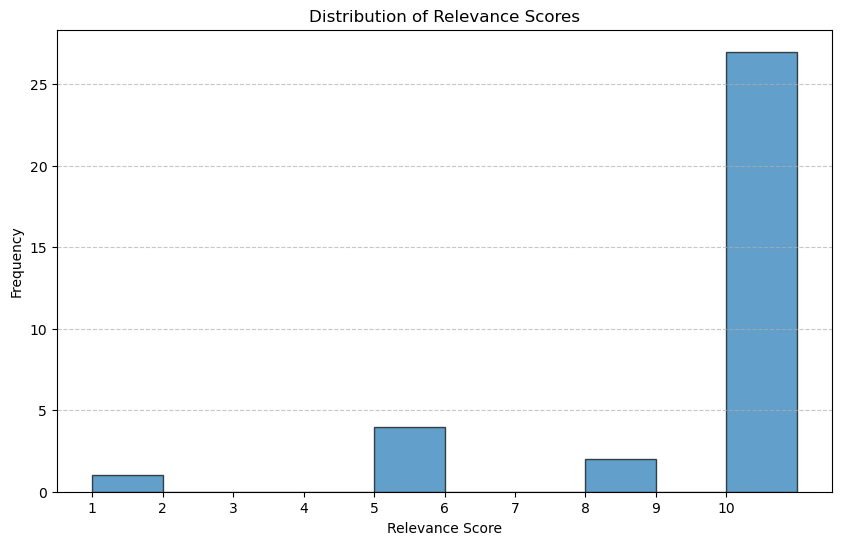

In [69]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(df['relevance_score'].dropna(), bins=range(1, 12), edgecolor='black', alpha=0.7)
plt.xlabel('Relevance Score')
plt.ylabel('Frequency')
plt.title('Distribution of Relevance Scores')
plt.xticks(range(1, 11))  # Ensure that the x-axis ticks match possible relevance scores
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [71]:
df.head(15)

,title,url,type,tags,description,thumbnailUrl,is_energy_related,relevance_score,energy_category,is_valid_url
1,BioGas/CNG_EV,https://www.usda.gov/giseas1/rest/services/Bio...,Map Service,"USDA - Enterprise Application Services,EnergyA...",Natural Gas Fueling Stations: This layer consi...,https://www.usda.gov/giseas1/rest/services/Bio...,True,5.0,renewables,True
2,EnergyInvestments/EnergyInvestments_EnergyEffi...,https://www.usda.gov/giseas1/rest/services/Ene...,Map Service,"USDA - Enterprise Application Services,EnergyA...",The USDA Energy Investments contains informati...,https://www.usda.gov/giseas1/rest/services/Ene...,True,NaN,None,True
3,EnergyInvestments/EnergyInvestments_Anaerobic,https://www.usda.gov/giseas1/rest/services/Ene...,Map Service,"USDA - Enterprise Application Services,EnergyA...",The USDA Energy Investments contains informati...,https://www.usda.gov/giseas1/rest/services/Ene...,True,NaN,None,True
4,EnergyInvestments/EnergyInvestments_Hydroelectric,https://www.usda.gov/giseas1/rest/services/Ene...,Map Service,"USDA - Enterprise Application Services,EnergyA...",The USDA Energy Investments contains informati...,https://www.usda.gov/giseas1/rest/services/Ene...,True,NaN,None,True
5,EnergyInvestments/EnergyInvestments_Biomass,https://www.usda.gov/giseas1/rest/services/Ene...,Map Service,"USDA - Enterprise Application Services,EnergyA...",The USDA Energy Investments contains informati...,https://www.usda.gov/giseas1/rest/services/Ene...,True,NaN,None,True
6,EnergyInvestments/EnergyInvestments_Geothermal,https://www.usda.gov/giseas1/rest/services/Ene...,Map Service,"USDA - Enterprise Application Services,EnergyA...",The USDA Energy Investments contains informati...,https://www.usda.gov/giseas1/rest/services/Ene...,True,NaN,None,True
7,EnergyInvestments/EnergyInvestments_Other,https://www.usda.gov/giseas1/rest/services/Ene...,Map Service,"USDA - Enterprise Application Services,EnergyA...",The USDA Energy Investments contains informati...,https://www.usda.gov/giseas1/rest/services/Ene...,True,NaN,None,True
8,EnergyInvestments/EnergyInvestments_Reporting,https://www.usda.gov/giseas1/rest/services/Ene...,Map Service,"USDA - Enterprise Application Services,EnergyA...",The USDA Energy Investments contains informati...,https://www.usda.gov/giseas1/rest/services/Ene...,True,NaN,None,True
9,EnergyInvestments/EnergyInvestments_Hydrogen,https://www.usda.gov/giseas1/rest/services/Ene...,Map Service,"USDA - Enterprise Application Services,EnergyA...",The USDA Energy Investments contains informati...,https://www.usda.gov/giseas1/rest/services/Ene...,True,NaN,None,True
10,EnergyInvestments/EnergyInvestments_Solar,https://www.usda.gov/giseas1/rest/services/Ene...,Map Service,"USDA - Enterprise Application Services,EnergyA...",The USDA Energy Investments contains informati...,https://www.usda.gov/giseas1/rest/services/Ene...,True,NaN,None,True
